# Table of Contents
* Exploratory Data Analysis and Cleaning
* Distribution of features
* Feature engineering
* Correlation and relation between data
* Preprocessing features and train-test splitting
* Running Models and tuning
* Model Results & Interpretation

## 1. Exploratory Data Analysis


In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
import os
from pprint import pprint

#show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

KeyboardInterrupt: 

In [ ]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Loading the data

In [ ]:
df = pd.read_csv('data/raw/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape
df.describe()
df.info()
df.dtypes

(48895, 16)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# check null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Check duplicates and drop duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

0

### Minor data cleanup

Removing columns that should not have an effect on the price recommendation

In [ ]:

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# Clean reviews per month NaN == 0.0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df.head()
df.shape
# check null values
df.isnull().sum()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


(48895, 16)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Visualisations

In [ ]:
# List of top hosts_id
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
# Drop unused or quantitatively insignificant columns
df.drop(['name','id','host_name','last_review',"host_id"], axis=1, inplace=True)

##### Distribution of object columns

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

Text(0.5, 1.0, 'Neighbourhood Group')

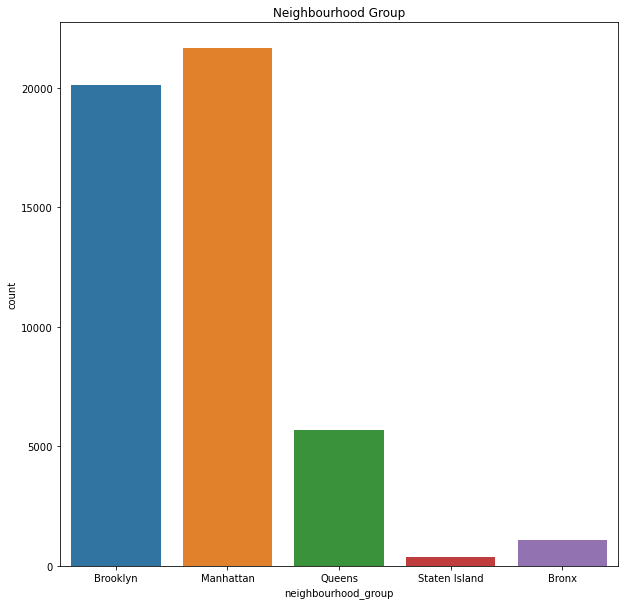

In [ ]:
# neighbourhood_group
sns.countplot(df['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

Text(0.5, 1.0, 'Neighbourhood')

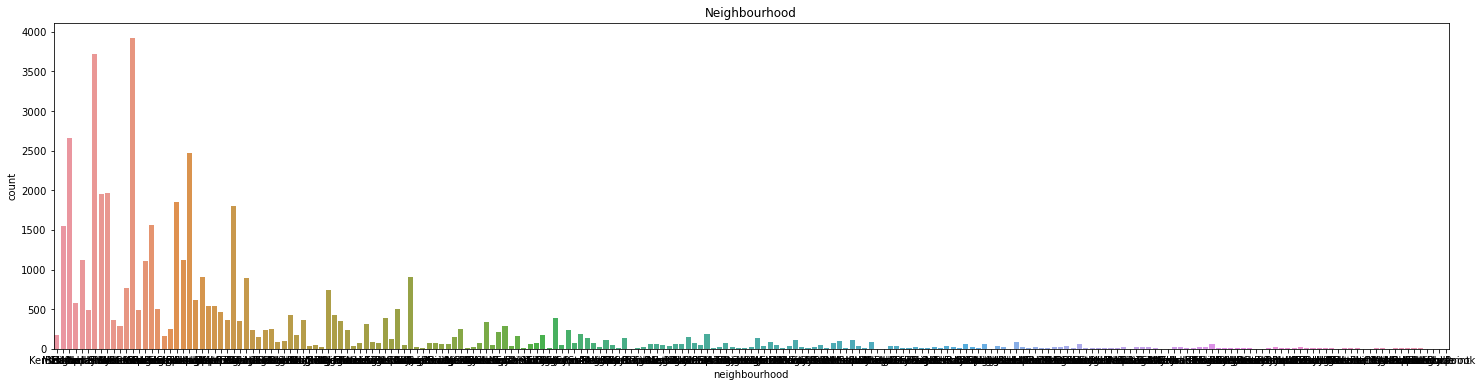

In [ ]:
# neighbourhood
sns.countplot(df['neighbourhood'] )
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

Text(0.5, 1.0, 'Room types Count')

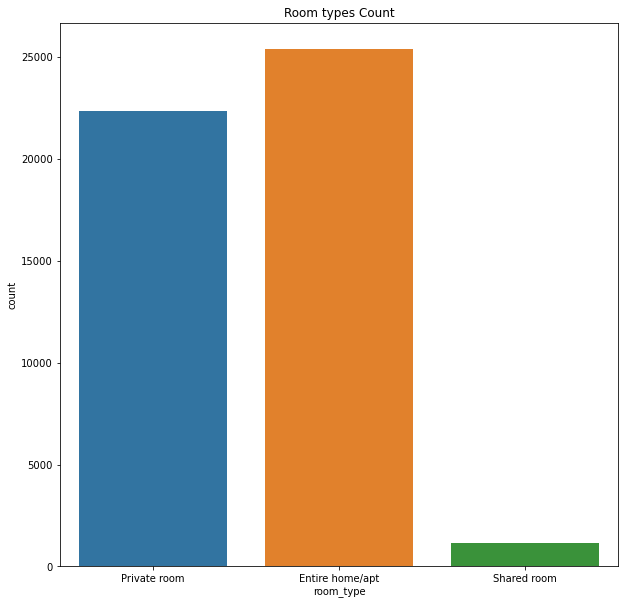

In [ ]:
#Restaurants delivering Online or not
sns.countplot(df['room_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room types Count')

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'neighbourhood_group')

Text(0, 0.5, 'count')

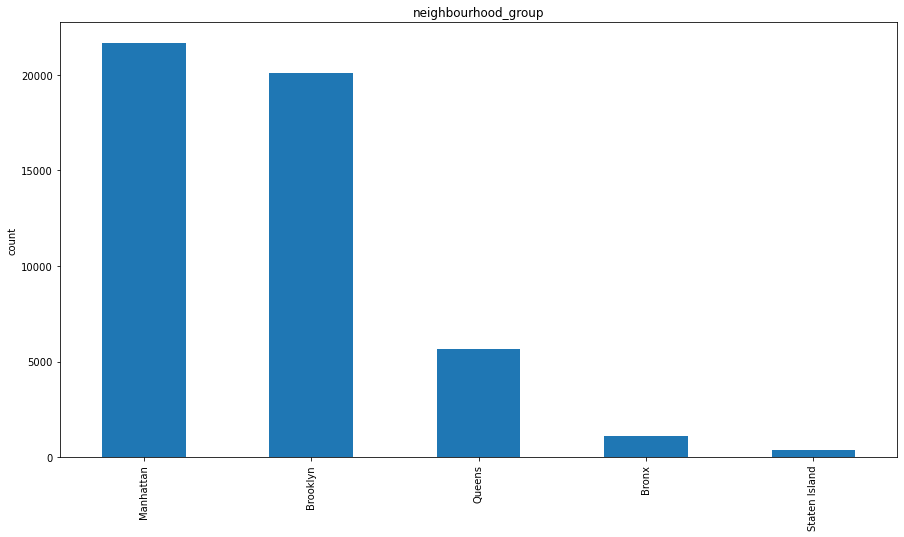

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'neighbourhood')

Text(0, 0.5, 'count')

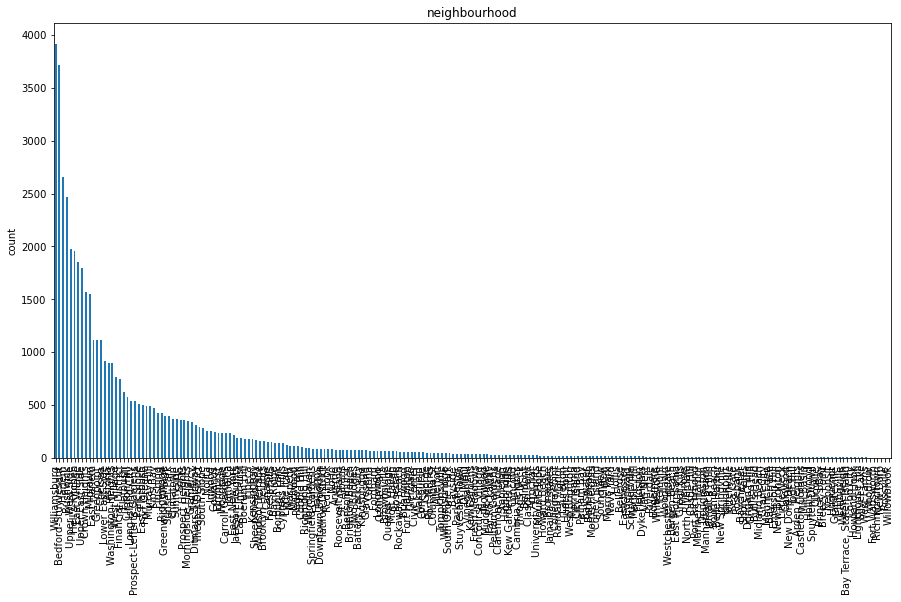

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'room_type')

Text(0, 0.5, 'count')

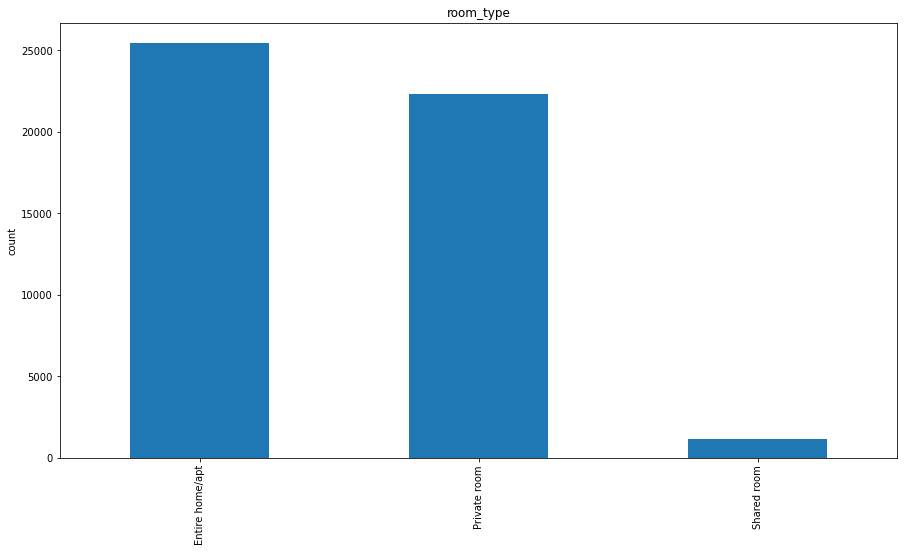

In [ ]:
  for i in range(df.shape[1]):
    if df[df.columns[i]].dtype =='O' :
        x=df.columns[i]
        plt.figure(figsize=(15,8))
        df[x].value_counts().plot(kind='bar')
        plt.title(x)
        plt.ylabel('count')
        plt.show()

## 2. Distribution of features

### Distribution Integer columns

<Figure size 1080x576 with 0 Axes>

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

Text(0.5, 1.0, 'price')

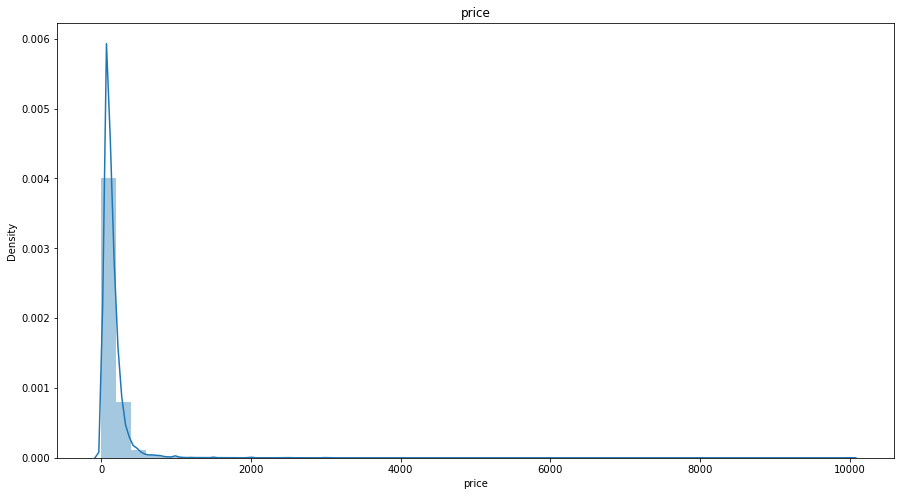

<Figure size 1080x576 with 0 Axes>

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

Text(0.5, 1.0, 'minimum_nights')

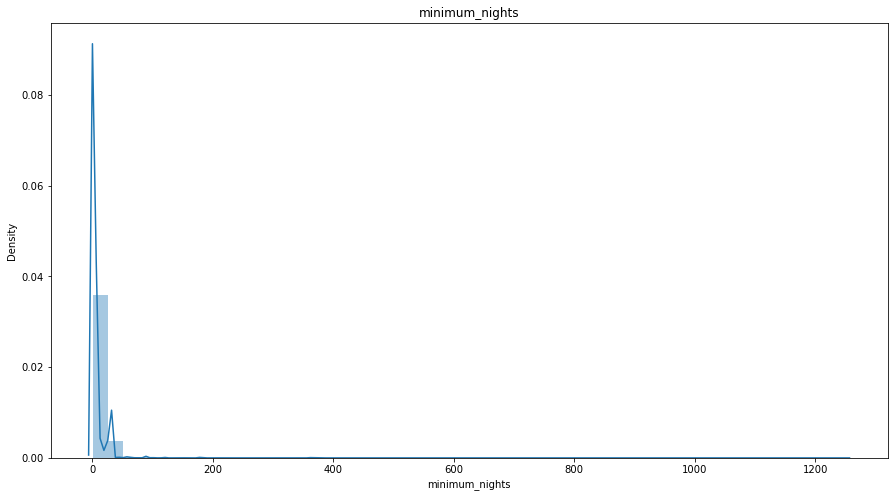

<Figure size 1080x576 with 0 Axes>

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

Text(0.5, 1.0, 'number_of_reviews')

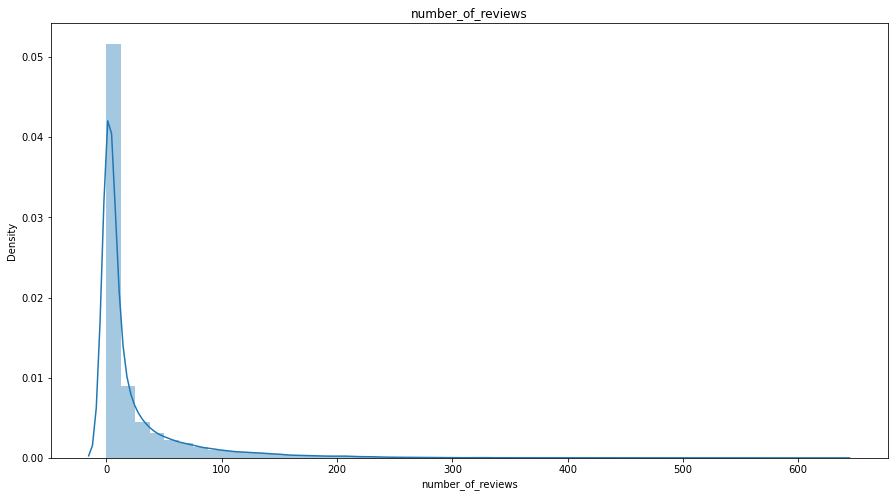

<Figure size 1080x576 with 0 Axes>

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Density'>

Text(0.5, 1.0, 'calculated_host_listings_count')

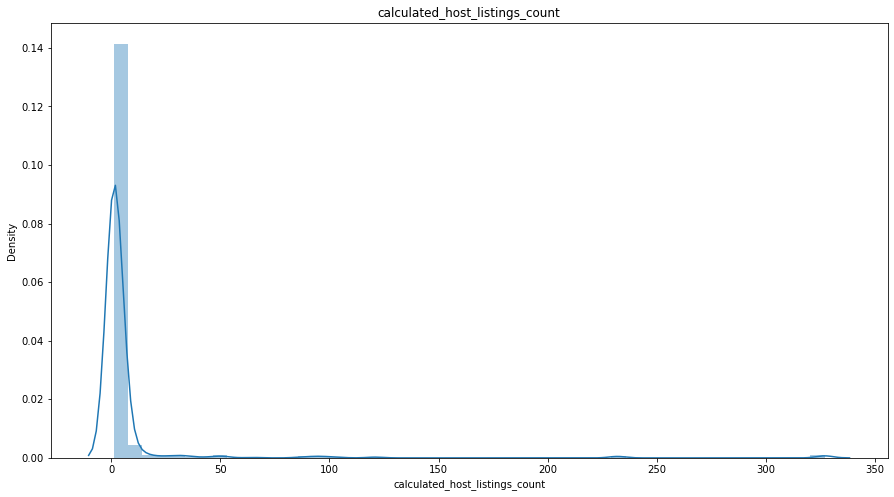

<Figure size 1080x576 with 0 Axes>

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

Text(0.5, 1.0, 'availability_365')

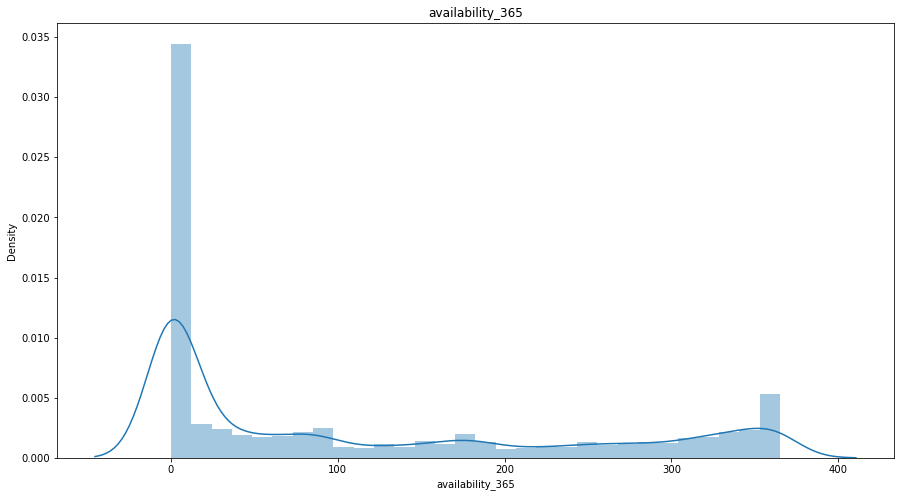

In [ ]:
# Distribution of each int64 columns data point

for i in range(df.shape[1]):
    
    if df[df.columns[i]].dtype =='int64' :
        plt.figure(figsize=(15,8))
        z = df.columns[i]
        sns.distplot(df[z])
        plt.title(z)
        plt.show()

### Distribution of float columns

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

Text(0.5, 1.0, 'latitude')

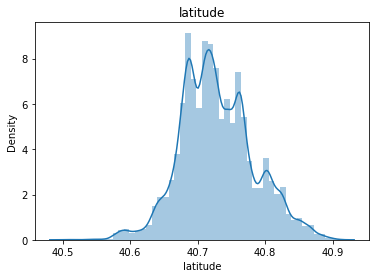

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longitude', ylabel='Density'>

Text(0.5, 1.0, 'longitude')

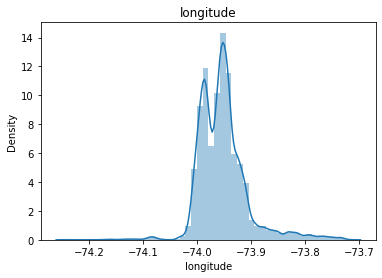

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

Text(0.5, 1.0, 'reviews_per_month')

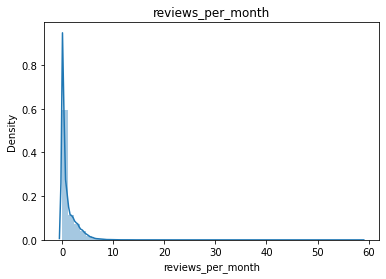

In [ ]:
for i in range(df.shape[1]):
    
    if df[df.columns[i]].dtype =='float64' :

        z = df.columns[i]
        sns.distplot(df[z])
        plt.title(z)
        plt.show()

<Figure size 2880x720 with 0 Axes>

(array([7.000e+00, 1.000e+01, 2.200e+01, 1.500e+02, 4.080e+02, 4.170e+02,
        1.245e+03, 2.223e+03, 5.740e+03, 7.155e+03, 8.581e+03, 6.187e+03,
        6.447e+03, 3.142e+03, 2.969e+03, 2.213e+03, 9.830e+02, 7.270e+02,
        2.120e+02, 5.700e+01]),
 array([40.49979  , 40.5204535, 40.541117 , 40.5617805, 40.582444 ,
        40.6031075, 40.623771 , 40.6444345, 40.665098 , 40.6857615,
        40.706425 , 40.7270885, 40.747752 , 40.7684155, 40.789079 ,
        40.8097425, 40.830406 , 40.8510695, 40.871733 , 40.8923965,
        40.91306  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'latitude')

(array([7.0000e+00, 6.0000e+00, 1.6000e+01, 3.3000e+01, 6.2000e+01,
        1.0800e+02, 1.4100e+02, 3.6000e+01, 1.6280e+03, 1.2574e+04,
        1.2479e+04, 1.2672e+04, 5.1510e+03, 1.3070e+03, 8.6100e+02,
        6.1500e+02, 4.7900e+02, 3.5700e+02, 2.4400e+02, 1.1900e+02]),
 array([-74.24442  , -74.2178485, -74.191277 , -74.1647055, -74.138134 ,
        -74.1115625, -74.084991 , -74.0584195, -74.031848 , -74.0052765,
        -73.978705 , -73.9521335, -73.925562 , -73.8989905, -73.872419 ,
        -73.8458475, -73.819276 , -73.7927045, -73.766133 , -73.7395615,
        -73.71299  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'longitude')

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'price')

(array([4.8566e+04, 1.9200e+02, 6.3000e+01, 1.3000e+01, 1.1000e+01,
        3.8000e+01, 1.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 6.34500e+01, 1.25900e+02, 1.88350e+02, 2.50800e+02,
        3.13250e+02, 3.75700e+02, 4.38150e+02, 5.00600e+02, 5.63050e+02,
        6.25500e+02, 6.87950e+02, 7.50400e+02, 8.12850e+02, 8.75300e+02,
        9.37750e+02, 1.00020e+03, 1.06265e+03, 1.12510e+03, 1.18755e+03,
        1.25000e+03]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'minimum_nights')

(array([3.8782e+04, 4.5160e+03, 2.3200e+03, 1.2510e+03, 8.2300e+02,
        4.4300e+02, 3.2100e+02, 1.7800e+02, 9.5000e+01, 4.8000e+01,
        4.1000e+01, 2.6000e+01, 1.8000e+01, 1.3000e+01, 9.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([  0.  ,  31.45,  62.9 ,  94.35, 125.8 , 157.25, 188.7 , 220.15,
        251.6 , 283.05, 314.5 , 345.95, 377.4 , 408.85, 440.3 , 471.75,
        503.2 , 534.65, 566.1 , 597.55, 629.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'number_of_reviews')

(array([4.2837e+04, 5.1900e+03, 7.0100e+02, 1.2700e+02, 2.9000e+01,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  2.925,  5.85 ,  8.775, 11.7  , 14.625, 17.55 , 20.475,
        23.4  , 26.325, 29.25 , 32.175, 35.1  , 38.025, 40.95 , 43.875,
        46.8  , 49.725, 52.65 , 55.575, 58.5  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'reviews_per_month')

(array([46577.,   614.,   332.,   219.,     0.,   370.,   103.,   121.,
            0.,     0.,     0.,     0.,     0.,     0.,   232.,     0.,
            0.,     0.,     0.,   327.]),
 array([  1. ,  17.3,  33.6,  49.9,  66.2,  82.5,  98.8, 115.1, 131.4,
        147.7, 164. , 180.3, 196.6, 212.9, 229.2, 245.5, 261.8, 278.1,
        294.4, 310.7, 327. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'calculated_host_listings_count')

(array([21390.,  2206.,  1705.,  1599.,  2396.,   849.,   843.,   864.,
         1190.,  1543.,   977.,   707.,   877.,  1043.,  1022.,  1068.,
         1209.,  1578.,  2133.,  3696.]),
 array([  0.  ,  18.25,  36.5 ,  54.75,  73.  ,  91.25, 109.5 , 127.75,
        146.  , 164.25, 182.5 , 200.75, 219.  , 237.25, 255.5 , 273.75,
        292.  , 310.25, 328.5 , 346.75, 365.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'availability_365')

<Figure size 2880x720 with 0 Axes>

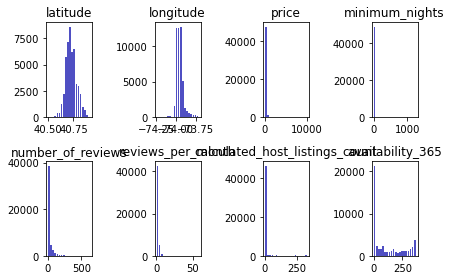

In [ ]:
int_col = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=[40,10])
f,a = plt.subplots(2,4)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(int_col.iloc[:,idx], bins=20, color='#0504aa',alpha=0.7, rwidth=0.8)
    ax.set_title(int_col.columns[idx])
plt.tight_layout()

## 3. Feature Engineering

In [ ]:
df['all_year_avail'] = df['availability_365']>353
df['low_avail'] = df['availability_365']< 12
df['no_reviews'] = df['reviews_per_month']==0
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,all_year_avail,low_avail,no_reviews
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,True,False,False
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,True,False,False
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,True,False,True
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,False,False,False
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,False,True,False


## 4. Correlation and relation between data

#### Correlation of availability and neighbourhood_group.


From the boxplot, we can see that queens neighbourhood is the most available through out the year compared to other groups.

<Figure size 720x720 with 0 Axes>

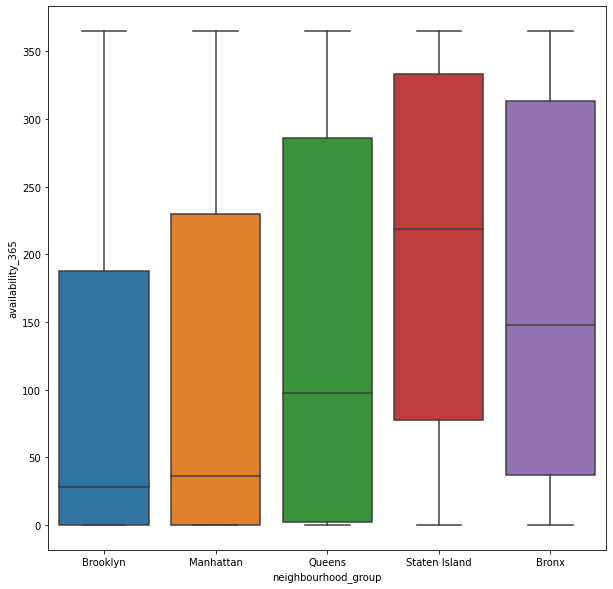

In [ ]:
# Relationship between neighbourhood_group and availability_365
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')

### Optimal Pricing recommendation. - Adjusting for price distribution



The target feature, Price, has a highly skewed distribution. This can cause problems for machine learning algorithms such as linear regression. A log transformation and removal of outliers makes the distribution look much closer to normal.

#### Testing different techniques to handle price data Skew

In [ ]:
df["price"].skew()

19.118938995046033

#### Log Skew adjustment

In [ ]:
# applying log skew! - dropped to 0.55!
log_skew = np.log1p(df["price"])
log_skew.skew()


0.5531045462041445

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


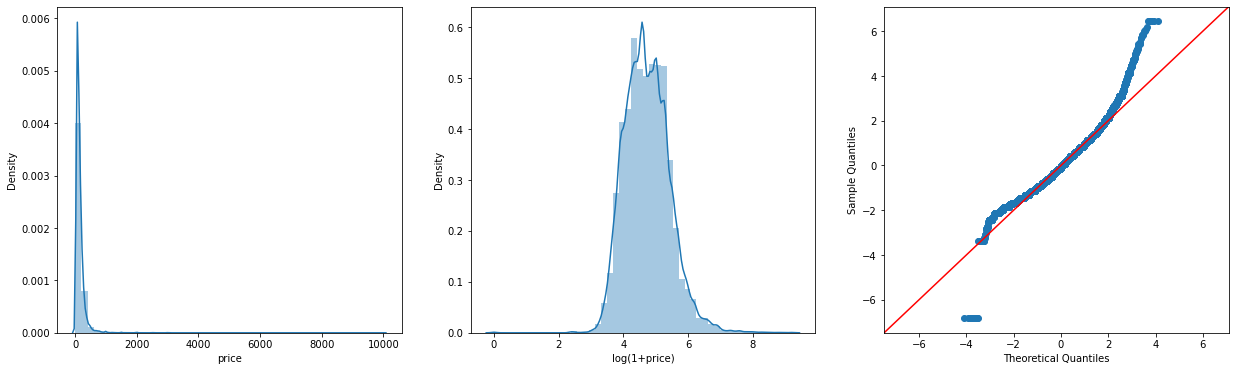

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log1p(df['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(df['price']), stats.norm, fit=True, line='45', ax=axes[2]);

#### Sqrt transform

In [ ]:
# Decent reduction but log still better!
sqrt_skew = np.sqrt(df["price"])
sqrt_skew.skew()

4.028002623382492

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


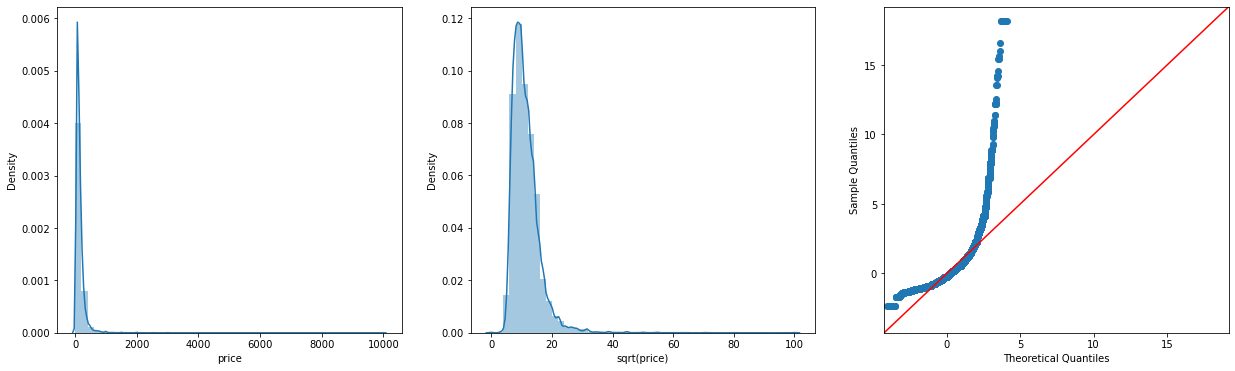

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.sqrt(df['price']), ax=axes[1])
axes[1].set_xlabel('sqrt(price)')
sm.qqplot(np.sqrt(df['price']), stats.norm, fit=True, line='45', ax=axes[2]);

In [ ]:
## Conclusion - we will replace price with the log ttransformed data
df['price'] = np.log1p(df['price'])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,all_year_avail,low_avail,no_reviews
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.010635,1,9,0.21,6,365,True,False,False
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.420535,1,45,0.38,2,355,True,False,False
2,Manhattan,Harlem,40.80902,-73.94190,Private room,5.017280,3,0,0.00,1,365,True,False,True
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.499810,1,270,4.64,1,194,False,False,False
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,4.394449,10,9,0.10,1,0,False,True,False


### Correlation between different features.


We can see that the prices set for each rental is highly correlated to the latitude(location), whether or not there are reviews and minimum nights booked. Based on our EDA we can build the model focused on providing an optimal rental pricing for hosts based on several features of their property

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

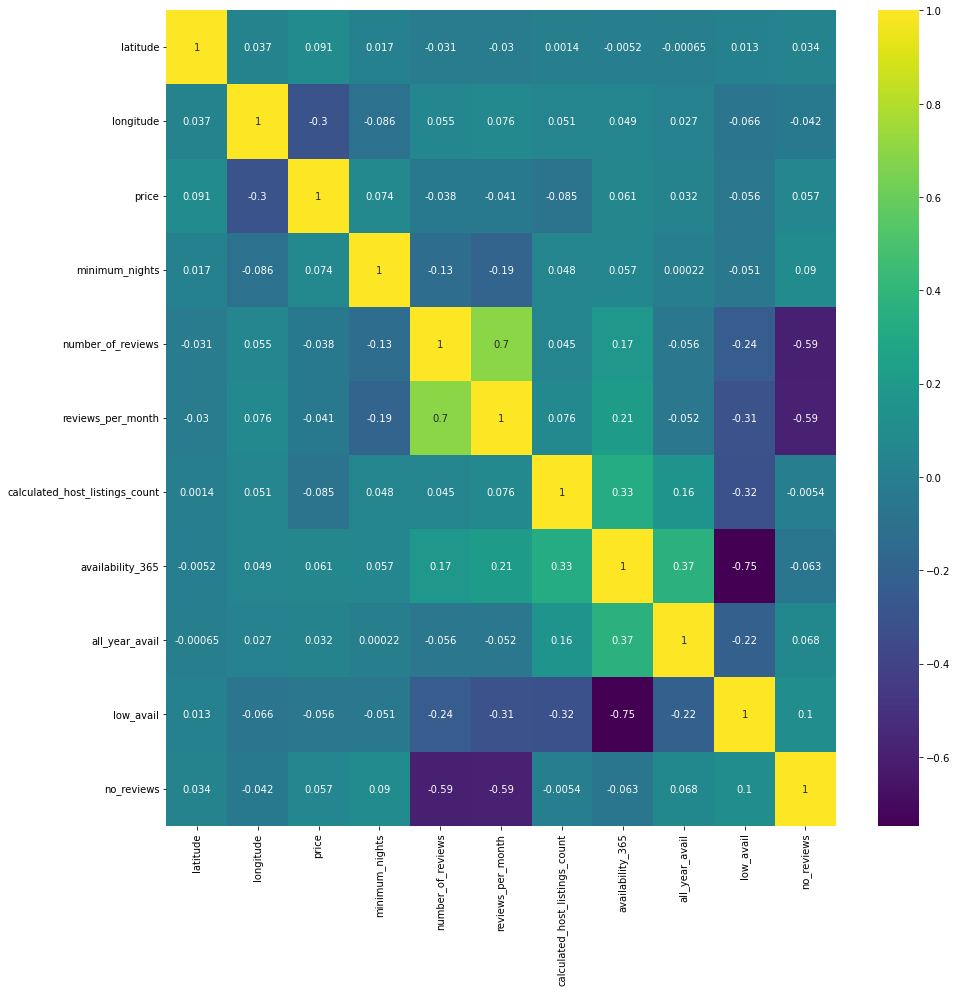

In [ ]:

corr = df.corr(method='kendall')
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.tight_layout()
sns.heatmap(corr, annot=True, cmap='viridis')

* Looking out for features correlated with target variable which is price , important because helps the model effectively predict the price.

* Looking out for correlation between the features to pick up multi collinearity. This is important as it dropping either features will be help to reduce dimension and use less computing resources and train faster while not losing information.


## 5. Preprocessing features and train-test splitting

#### Cleaning up features using pipeline

In [ ]:
from src.data_preprocessing import DataPipeline

In [ ]:
pl = DataPipeline()
columns_to_skew = ["price"]

In [ ]:
df = pl.full_cleanup(data_path="data/raw/AB_NYC_2019.csv",columns=columns_to_skew)
df.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
all_year_avail                      int64
low_avail                           int64
no_reviews                          int64
dtype: object

In [ ]:
df
df.shape

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,all_year_avail,low_avail,no_reviews
0,brooklyn,kensington,40.64749,-73.97237,private_room,5.010635,1,9,0.21,6,365,1,0,0
1,manhattan,midtown,40.75362,-73.98377,entire_home/apt,5.420535,1,45,0.38,2,355,1,0,0
2,manhattan,harlem,40.80902,-73.94190,private_room,5.017280,3,0,0.00,1,365,1,0,1
3,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,4.499810,1,270,4.64,1,194,0,0,0
4,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,4.394449,10,9,0.10,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private_room,4.262680,2,0,0.00,2,9,0,1,1
48891,brooklyn,bushwick,40.70184,-73.93317,private_room,3.713572,4,0,0.00,2,36,0,0,1
48892,manhattan,harlem,40.81475,-73.94867,entire_home/apt,4.753590,10,0,0.00,1,27,0,0,1
48893,manhattan,hell's_kitchen,40.75751,-73.99112,shared_room,4.025352,1,0,0.00,6,2,0,1,1


(48895, 14)

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))
categorical_features.head()

Categorical features: (48895, 3)


,neighbourhood_group,neighbourhood,room_type
0,brooklyn,kensington,private_room
1,manhattan,midtown,entire_home/apt
2,manhattan,harlem,private_room
3,brooklyn,clinton_hill,entire_home/apt
4,manhattan,east_harlem,entire_home/apt


####  train-test split

In [ ]:
train_data, test_data = pl.prepare_train_test(df)


#### Encoding features

In [ ]:
x_train, y_train=pl.transform_train_data(train_data)
x_test, y_test=pl.transform_test_data(test_data)

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Dimensions of the training feature matrix: {}'.format(x_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(x_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (39116, 236)
Dimensions of the training target vector: (39116,)
Dimensions of the test feature matrix: (9779, 236)
Dimensions of the test target vector: (9779,)


## 6. Running models and tuning

#### Preparing evaluation metrics

In [ ]:
from src.model import ModelEvaluator
from src.model import Model
# N-fold = 5 by default
evaluator = ModelEvaluator()
model = Model()


In [ ]:
x_train.select_dtypes(exclude=['object'])

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,reviews_per_month,neighbourhood_group_bronx,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,neighbourhood_group_queens,neighbourhood_group_staten_island,...,neighbourhood_woodhaven,neighbourhood_woodlawn,neighbourhood_woodrow,neighbourhood_woodside,room_type,longitude,latitude,all_year_avail,low_avail,no_reviews
0,-0.857266,-0.185329,-0.145443,-0.498466,-0.665383,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.70178,-73.92829,0.0,1.0,0.0
1,-0.469367,-0.185329,-0.193460,-0.520806,-0.677794,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.81157,-73.94654,0.0,0.0,1.0
2,0.344461,-0.185329,-0.193460,0.104713,1.376319,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.79485,-73.97550,0.0,0.0,0.0
3,-0.857266,-0.185329,-0.241478,-0.520806,-0.677794,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.75997,-73.99265,0.0,1.0,1.0
4,-0.857266,-0.154982,-0.289495,-0.453786,-0.317859,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,40.67818,-73.92284,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,1.660276,0.118139,1.103009,0.372792,-0.181332,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,40.69363,-73.95980,0.0,0.0,0.0
39112,0.314037,-0.185329,-0.241478,2.428069,1.593522,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.76016,-73.96910,0.0,0.0,0.0
39113,-0.857266,-0.185329,-0.193460,-0.297407,-0.504032,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.80380,-73.95569,0.0,1.0,0.0
39114,-0.727967,-0.185329,-0.241478,-0.141027,0.085517,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,40.86706,-73.84674,0.0,0.0,0.0


In [ ]:
numerical_features =  df.select_dtypes(exclude=['object'])
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))
numerical_features.columns

Numerical features: (48895, 10)


Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'all_year_avail', 'low_avail', 'no_reviews'],
      dtype='object')

In [ ]:
numerical_features

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,all_year_avail,low_avail,no_reviews
0,40.64749,-73.97237,1,9,0.21,6,365,1,0,0
1,40.75362,-73.98377,1,45,0.38,2,355,1,0,0
2,40.80902,-73.94190,3,0,0.00,1,365,1,0,1
3,40.68514,-73.95976,1,270,4.64,1,194,0,0,0
4,40.79851,-73.94399,10,9,0.10,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9,0,1,1
48891,40.70184,-73.93317,4,0,0.00,2,36,0,0,1
48892,40.81475,-73.94867,10,0,0.00,1,27,0,0,1
48893,40.75751,-73.99112,1,0,0.00,6,2,0,1,1


#### Training model with no tuning/feature reduction - random forest

I plan to focus on using the RandomForest model as it requires minimal data prep and can easily do feature selection and dimenson reduction. It is immune to outliers present in dataset.

In [ ]:
# for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
#     if Model == XGBRegressor: 
#         cv_res = evaluator.rmse_cv(XGBRegressor(objective='reg:squarederror'),numerical_features=numerical_features,X_train=x_train,y_train=y_train)
#     else: cv_res = evaluator.rmse_cv(model=Model(),numerical_features=numerical_features,X_train=x_train,y_train=y_train)
#     print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

In [ ]:
params = {'model': 'RandomForestRegressor', "RFECV":0}

In [ ]:
train_mse_train , train_rmse_w_cv , train_r_sqr, train_rmsle = model.train(params,x_train, y_train)

RFECV: False
Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
mse_train score is :0.027401282821618772
RMSLE Value is :0.16345447150122994 
rmse_w_cv score is :[-0.20968901 -0.19750844 -0.1872279  -0.20232424 -0.19319336]
r2_score score is :0.9430296971879233
Initiated model: RandomForestRegressor(random_state=42) successfully


In [ ]:
test_mse_train , test_rmse_w_cv , test_r_sqr, test_rmsle = model.evaluate(x_test, y_test)

mse_test score is :0.20001047740488387
rmse_w_cv score is :[-0.20275901 -0.20679259 -0.23380507 -0.21020419 -0.23001365]
RMSLE Value is :0.44219848339243134 
r2_score Value is :0.5947672821977614 


We can see here that just using the untuned randomforest model , we are about to get the following evaluation scores


* mse_test score is :0.20001047740488387
* rmse_w_cv score is :[-0.20275901 -0.20679259 -0.23380507 -0.21020419 -0.23001365]
* RMSLE Value is :0.44219848339243134 
* r2_score Value is :0.5947672821977614 


We will be uisng RMSLE for the following reasons:

1.robust with outliers

2.gives bigger penality for under prediction --> so for our use case we dont want our customers to feel that they got less rental.

#### Checking feature Importance and hyperparams tuning

##### Finding feature importance based on mean decrease in impurity

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


In [ ]:
forest = RandomForestRegressor(random_state=42)
feature_names = x_train.columns
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
ranks = {}
ranks = ranking(forest.feature_importances_, feature_names)

In [ ]:
sorted_keys  = sorted(ranks, key=ranks.get, reverse=True)
sorted_dict = {}
for w in sorted_keys:
    sorted_dict[w] = ranks[w]


In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

<AxesSubplot:>

Text(0.5, 1.0, 'Feature importances using MDI')

Text(0, 0.5, 'Mean decrease in impurity')

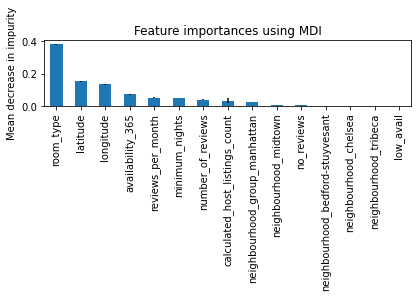

In [ ]:

forest_importances = pd.Series(forest.feature_importances_, index=feature_names)
forest_importances= forest_importances.sort_values(ascending=False)
ten = forest_importances[:15]
fig, ax = plt.subplots()
ten.plot.bar(yerr=std[:15], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We can see here that the following features are important in predicting prices. 
room_type,Latitude(location),longitude(location), availability_365,reviews_per_month,minimum_nights, calculated_host_listings_count neighbourhood groups and neighbourhoods.

##### HyperParameter tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf_random = RandomizedSearchCV(estimator=forest, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(max_depth=100, min_samples_leaf=4, n_estimators=1200,
                      random_state=0)

In [ ]:
best_param = rf_random.best_params_
best_param

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

#### Running Random_forest with best_params

In [ ]:
from src.data_preprocessing import DataPipeline
pl = DataPipeline()
columns_to_skew = ["price"]
df = pl.full_cleanup(data_path="data/raw/AB_NYC_2019.csv",columns=columns_to_skew)

In [ ]:
train_data, test_data = pl.prepare_train_test(df)
x_train, y_train=pl.transform_train_data(train_data)
x_test, y_test=pl.transform_test_data(test_data)

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Dimensions of the training feature matrix: {}'.format(x_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(x_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (39116, 236)
Dimensions of the training target vector: (39116,)
Dimensions of the test feature matrix: (9779, 236)
Dimensions of the test target vector: (9779,)


In [ ]:
from src.model import ModelEvaluator
from src.model import Model
# N-fold = 5 by default
evaluator = ModelEvaluator()
model = Model()

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
best_params = {'model': 'RandomForestRegressor', "RFECV":0,"best_params":{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}}

In [ ]:
train_mse_train , train_rmse_w_cv , train_r_sqr, train_rmsle = model.train(best_params,x_train, y_train)

RFECV: False
Applying best_params to model
Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
mse_train score is :0.08635385843821067
RMSLE Value is :0.29025365694063865 
rmse_w_cv score is :[-0.20490979 -0.19155395 -0.18087034 -0.19576614 -0.18905101]
r2_score score is :0.820460761043835
Initiated model: RandomForestRegressor(max_depth=100, min_samples_leaf=4, n_estimators=1200,
                      random_state=0) successfully


In [ ]:
test_mse_train , test_rmse_w_cv , test_r_sqr, test_rmsle = model.evaluate(x_test, y_test)

mse_test score is :0.1960667442730074
rmse_w_cv score is :[-0.19857018 -0.20228456 -0.228084   -0.19900079 -0.22674646]
RMSLE Value is :0.4378352871283975 
r2_score Value is :0.6027575120899781 


We can compare the scores Before tuning the model and after tuning the model:


* mse_test score is : 0.1960667442730074 vs 0.20001047740488387

* rmse_w_cv score is:[-0.19857018 -0.20228456 -0.228084   -0.19900079 -0.22674646]vs [-0.20275901 -0.20679259 -0.23380507 -0.21020419 -0.23001365]

* RMSLE Value is :0.4378352871283975  vs 0.44219848339243134 

* r2_score Value is :0.6027575120899781 vs 0.5947672821977614 



Overall we can see that tuning the model does improve the RMLSE slightly. Lets now try to remove features.

#### Feature Selection with best_params 

In [8]:
from src.data_preprocessing import DataPipeline
pl = DataPipeline()
columns_to_skew = ["price"]
df = pl.full_cleanup(data_path="data/raw/AB_NYC_2019.csv",columns=columns_to_skew)
train_data, test_data = pl.prepare_train_test(df)
x_train, y_train=pl.transform_train_data(train_data)
x_test, y_test=pl.transform_test_data(test_data)

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
print('Dimensions of the training feature matrix: {}'.format(x_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(x_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (39116, 236)
Dimensions of the training target vector: (39116,)
Dimensions of the test feature matrix: (9779, 236)
Dimensions of the test target vector: (9779,)


In [10]:
from src.model import ModelEvaluator
from src.model import Model
# N-fold = 5 by default
evaluator = ModelEvaluator()
model = Model()

In [11]:
params = {'model': 'RandomForestRegressor', "RFECV":0,"feature_select":1,"best_params":{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}}

In [12]:
train_mse_train , train_rmse_w_cv , train_r_sqr, train_rmsle = model.train(params,x_train, y_train)

RFECV: False
Feature_selection_on for training data: True
min_feature not detected. Setting default to 15
Fitting model RandomForestRegressor(random_state=0) for feature selection of minimum 15 features
Top 10 features ['room_type', 'latitude', 'longitude', 'availability_365', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 'calculated_host_listings_count', 'neighbourhood_group_manhattan', 'neighbourhood_midtown']
number of features to drop 221
Dropping features now..
Applying best_params to model
Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
mse_train score is :0.08618701810454961
RMSLE Value is :0.289

In [13]:
test_mse_train , test_rmse_w_cv , test_r_sqr, test_rmsle = model.evaluate(x_test, y_test)

feature_select starting on testing data
Dropping 221 features from X_test
mse_test score is :0.1964400364868718
detected 15numeric features 
rmse_w_cv score is :[-0.19947166 -0.20169511 -0.22833816 -0.19873925 -0.22539439]
RMSLE Value is :0.43825780096011835 
r2_score Value is :0.6020012006190922 
